This notebook contains some code to find relationships between the training data and the output of the models.


In [ ]:
# at the moment this still needs a different branch with some function not in the main package
pip install git+https://github.com/k-tonal/mimikit@berlach

In [3]:
import numpy as np
import librosa
import soundfile as sf
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from mimikit.data import Database
from mimikit.analysis.trajectories import distance_to_nnbrs, find_short_trajectory

In [65]:
# convenience function to quickly get a trajectory that shows in which way the model output travels through the 
# training data space

def get_trajectory(x, db):
    X = librosa.stft(x, 2048, 512)
    Xflux = np.diff(abs(X))
    Xmag = abs(X)
    Xtrain = db.fft[:]
    dists, inds = distance_to_nnbrs(np.log(np.maximum(Xmag.T, 0.000001)), np.log(np.maximum(abs(Xtrain), 0.000001)))
    traj, cdist = find_short_trajectory(Xmag, Xtrain, dists, inds, n_trial_pathes=16)
    return inds[np.arange(len(traj[0])), traj[0]]

In [5]:
# get the database from a local location

db = Database('./dbs/babylachen_2.h5')
hop_length = db.fft.attrs['hop_length']
fs = db.fft.attrs['sr']

In [ ]:
# alternatively get the data from neptune
from mimikit.data import download_database
from mimikit import get_token

neptune_token = get_token()
database_name = "babylachen_2.h5"
db = download_database(neptune_token, "k-tonal/databases-and-notebooks/DAT-29", database_name)

In [69]:
# load audio file (local)

x,fs = sf.read("./experiment-1/EX1-7/audios/prompt=2625.wav")
traj = get_trajectory(x, db)

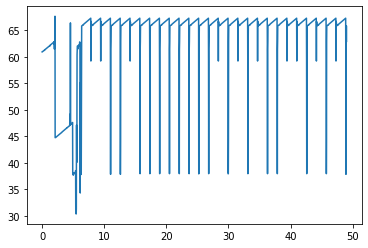

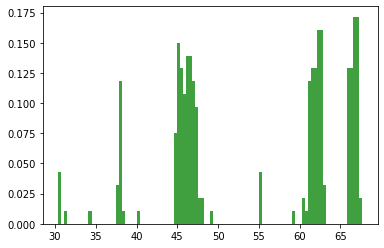

In [71]:
# plot the trajectory 
# the x axis is time in the audio file in seconds
# the y axis is the corresponding time in seconds where the training data is very similar
# the second plot is a histogram that shows how much of each time slice in the training data is covered in 
# the given model output.

plt.plot(np.arange(len(traj)) * hop_length/fs, traj * hop_length/fs)
plt.show()
time_points = np.array(sorted(list(set(list(traj))))) * hop_length/fs
n, bins, patches = plt.hist(time_points, 100, density=True, facecolor='g', alpha=0.75)

In [73]:
# load multiple model outputs to get a better impression of how the model relates to the data

audios = ["./experiment-1/EX1-7/audios/prompt=2625.wav",
          "./experiment-1/EX1-7/audios/prompt=3031.wav",
          "./experiment-1/EX1-7/audios/prompt=1264.wav",
          "./experiment-1/EX1-7/audios/prompt=801.wav",
          "./experiment-1/EX1-7/audios/prompt=740.wav"]

traj = []

for f in audios:
    x,fs = sf.read(f)
    traj = np.concatenate([traj, get_trajectory(x, db)])


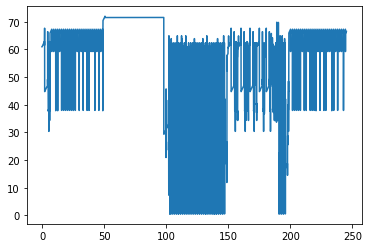

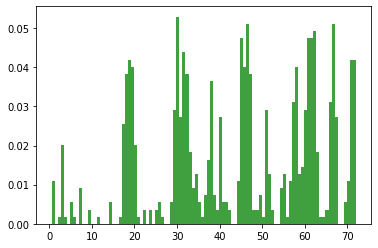

In [74]:
# plot trajectories and histogram for all the previously processed model outputs

plt.plot(np.arange(len(traj)) * hop_length/fs, traj * hop_length/fs)
plt.show()
time_points = np.array(sorted(list(set(list(traj))))) * hop_length/fs
n, bins, patches = plt.hist(time_points, 100, density=True, facecolor='g', alpha=0.75)
